Introducción

En el laboratorio de Calidad, para asegurar la calidad de las muestras, es fundamental realizar un control de pureza en placa junto con un recuento de Unidades Formadoras de Colonias (UFC) para verificar que la concentración bacteriana cumpla con los estándares requeridos. Esta práctica asegura no solo la pureza microbiológica, sino también la cantidad adecuada de microorganismos en la muestra, aspectos críticos para la confiabilidad y seguridad en aplicaciones posteriores.

Actualmente, se utiliza una metodología indirecta basada en la absorbancia para estimar la concentración de UFC. Este método se compara con el recuento en placa, un proceso directo pero más lento y laborioso. En este análisis, el objetivo es evaluar si la metodología actual de estimación de UFC por absorbancia es adecuada y estadísticamente significativa en comparación con los valores obtenidos mediante el recuento en placa. La validación de esta metodología podría permitir una estimación más rápida y eficiente de UFC, optimizando tiempos y recursos en el laboratorio.

Para realizar este análisis, se aplicarán técnicas de estadística descriptiva y análisis inferencial con el fin de:

-Evaluar las características de la distribución de ambas variables: absorbancia y recuento en placa 
-Comparar las medias y varianzas de ambas metodologías para determinar la concordancia y la homogeneidad de varianzas entre los métodos.
-Finalmente, se aplicarán pruebas de hipótesis y un ajuste de regresión para determinar si las diferencias observadas entre los métodos son estadísticamente significativas y para evaluar la dependencia entre las variables. 

A través de estos análisis, se buscará concluir si la absorbancia puede considerarse un método adecuado para estimar UFC de manera indirecta y ver si es necesario, volver a ajustar una curva de calibración y evaluar la correlación entre ambas variables, lo cual permitirá cuantificar de forma correcta la relación entre la absorbancia y el recuento en placa.



1. Descripción del sistema y de las variables

En primer lugar se importa pandas, se carga la base de datos con la que se realizará el análisis y se visualiza las filas y columnas de la misma:

In [19]:
import pandas as pd


# Cargar el archivo Excel
ruta_archivo = 'C:/python/analisis de curva.xlsx'
df = pd.read_excel(ruta_archivo)

In [20]:
# Mostrar las primeras filas de la tabla
print (df.head())

       Fecha  Dilucion  Absorbancia  UFC/ml (Abs)  UFC/ml (Placas Pureza  \
0 2020-07-28        32        0.430   18600000000     19600000000      p   
1 2020-08-04        64        0.333   26700000000     34800000000      p   
2 2020-08-11        32        0.297   13800000000     12300000000      p   
3 2020-11-17        16        0.465   11400000000     10500000000      p   
4 2020-11-17        16        0.470   11000000000     14900000000      p   

   LOG10 Abs  LOG10 placas     DxA  
0  10.269513     10.292256  13.760  
1  10.426511     10.541579  21.312  
2  10.139879     10.089905   9.504  
3  10.056905     10.021189   7.440  
4  10.041393     10.173186   7.520  


In [21]:
# Ver las columnas del DataFrame
print(df.columns) 

Index(['Fecha', 'Dilucion', 'Absorbancia', 'UFC/ml (Abs)', 'UFC/ml (Placas',
       'Pureza', 'LOG10 Abs', 'LOG10 placas', 'DxA'],
      dtype='object')


Se seleccionan las columnas a trabajar, en este caso se realiza un análisis de UFC (Unidades Formadoras de Colonias) por dos métodos distintos: absorbancia y recuento en placa. 

In [22]:
# Seleccionar las columnas para comparar
absorbancia = df['LOG10 Abs']
placas = df['LOG10 placas']

2. Representación gráfica de las distribuciones de frecuencias

Grafico de cajas que permite comparar visualmente la dispersión y los valores atípicos en las distribuciones de las variables de absorbancia y recuento en placa:

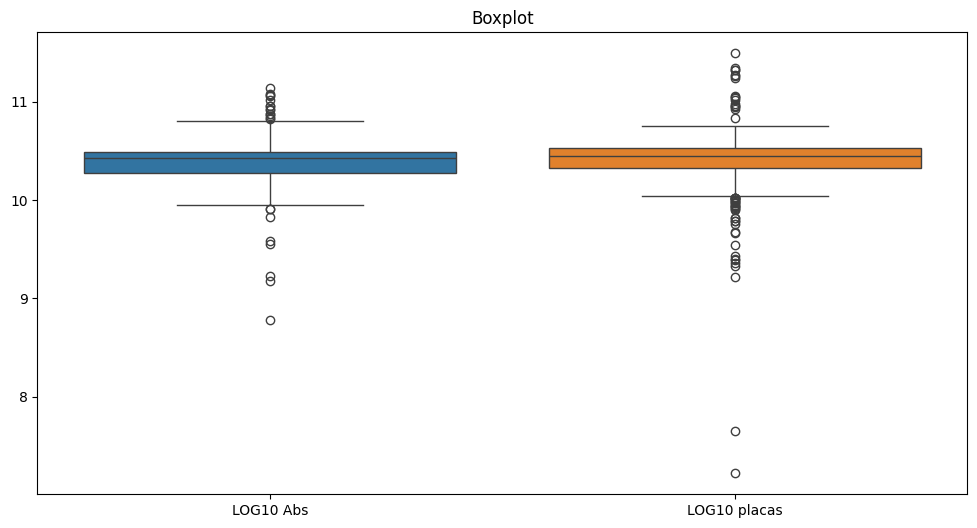

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
# Representación gráfica de las distribuciones con Boxplot para visualizar la dispersión de los datos de LOG10 Abs y LOG10 placas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['LOG10 Abs', 'LOG10 placas']])
plt.title('Boxplot')
plt.show()

3. Medidas características de cada distribución (centralización y dispersión)
Se presentan aquí las estadísticas descriptivas, como la media, mediana y desviación estándar, que nos proporcionan una visión de la centralización y dispersión de las mediciones para ambos métodos.

In [24]:
# Análisis descriptivo de LOG10 Abs y LOG10 placas para obtener medidas de centralización y dispersión
descriptivos_abs = absorbancia.describe()
descriptivos_placas = placas.describe()

# Mostrar las estadísticas descriptivas
print("Estadísticas descriptivas para LOG10 Abs:")
print(descriptivos_abs)
print("\nEstadísticas descriptivas para LOG10 placas:")
print(descriptivos_placas)

# Calcular rango intercuartílico (IQR)
iqr_abs = descriptivos_abs['75%'] - descriptivos_abs['25%']
iqr_placas = descriptivos_placas['75%'] - descriptivos_placas['25%']

print(f"\nRango intercuartílico para LOG10 Abs: {iqr_abs}")
print(f"Rango intercuartílico para LOG10 placas: {iqr_placas}")


Estadísticas descriptivas para LOG10 Abs:
count    524.000000
mean      10.387746
std        0.216368
min        8.775246
25%       10.271259
50%       10.429752
75%       10.488551
max       11.143015
Name: LOG10 Abs, dtype: float64

Estadísticas descriptivas para LOG10 placas:
count    524.000000
mean      10.405379
std        0.306622
min        7.220108
25%       10.330414
50%       10.445604
75%       10.531479
max       11.492760
Name: LOG10 placas, dtype: float64

Rango intercuartílico para LOG10 Abs: 0.21729127554359096
Rango intercuartílico para LOG10 placas: 0.20106514369306439


INTERPRETACIÓN:
#count: no hay filas faltantes.
#mean: las medias de ambas variables son bastante similares.
#std:La desviación estándar es baja en ambas variables, lo que indica que los valores están relativamente cerca de sus medios respectivos.
#Valores mínimos (min) y máximos (max): los rangos de valores en ambas columnas son bastante cercanos.
#50%:La mediana de ambas variables es casi igual, lo que indica que la distribución de ambas variables es similar.
#Rango intercuartílico :Ambos IQR son cercanos, lo que sugiere que ambas variables tienen una variabilidad similar.

4. Pruebas de normalidad: La prueba de Shapiro-Wilk evalúa si los datos de absorbancia y placas siguen una distribución normal, lo cual es importante para decidir qué pruebas de hipótesis aplicar.

In [25]:
from scipy import stats

#  Prueba de normalidad de Shapiro-Wilk
stat_absorbancia, p_value_absorbancia = stats.shapiro(absorbancia)
stat_placas, p_value_placas = stats.shapiro(placas)

print("Prueba de normalidad para UFC/ml (Abs): p-value =", p_value_absorbancia)
print("Prueba de normalidad para UFC/ml (Placas): p-value =", p_value_placas)

Prueba de normalidad para UFC/ml (Abs): p-value = 1.1305388719319624e-19
Prueba de normalidad para UFC/ml (Placas): p-value = 1.5155819631258535e-29


Dado que ambos p-values son mucho menores a 0.05, se concluye que las variables 'UFC/ml (Abs)' y 'UFC/ml (Placas)' no son normales. Esto tiene implicaciones para el análisis estadístico posterior, como la elección de pruebas no paramétricas. 

5. Prueba de homocedasticidad (Levene): La prueba de Levene verifica si las varianzas entre ambas muestras son iguales. Esto es fundamental para elegir la prueba de comparación adecuada entre las dos muestras.

In [26]:
import numpy as np
from scipy import stats

# Prueba de Levene para homocedasticidad 
stat_levene, p_value_levene = stats.levene(df['LOG10 Abs'], df['LOG10 placas'])

print(f"Estadístico de Levene: {stat_levene}")
print(f"p-value de Levene: {p_value_levene}")


Estadístico de Levene: 2.5948581888188786
p-value de Levene: 0.10751273086253553


Se puede observar que las variancias son similares ya que el valor p es mayor que el nivel de significancia típico (0,05) , no se rechaza la hipótesis nula de la prueba de Levene. La hipótesis nula de esta prueba establece que las variaciones entre los grupos son iguales.

6. Prueba pareada (Wilcoxon): Permite comparar si existen diferencias significativas entre las medidas obtenidas de absorbancia y recuento en placa en pares de datos relacionados.

In [27]:
# Prueba de Wilcoxon para muestras pareadas
wilcoxon_statistic, p_value_wilcoxon = stats.wilcoxon(df['LOG10 Abs'], df['LOG10 placas'])

print(f"Estadístico de Wilcoxon: {wilcoxon_statistic}")
print(f"p-value de Wilcoxon: {p_value_wilcoxon}")


Estadístico de Wilcoxon: 50622.0
p-value de Wilcoxon: 1.1321848205020836e-06


Dado que el p-valor es tan bajo, la diferencia entre las dos mediciones es significativa. Esto sugiere que la metodología de estimación de UFC por absorbancia no produce los mismos resultados que el recuento en placa.

7. Análisis de dependencia de variables (Correlación): La correlación de Spearman mide la asociación entre las dos variables (LOG10 Abs y LOG10 placas), evaluando si existe una relación monótona entre ellas.

In [28]:
# Calculo correlación de Spearman (para relaciones no lineales) #Para probar
spearman_corr, p_value_spearman = stats.spearmanr(absorbancia, placas)
print(f"Coeficiente de correlación de Spearman: {spearman_corr}")
print(f"p-value de correlación de Spearman: {p_value_spearman}")


Coeficiente de correlación de Spearman: 0.5607597033891021
p-value de correlación de Spearman: 9.961088770595752e-45


El valor de 0.560759 indica una correlación positiva moderada, a medida que aumenta LOG10 Abs, también tiende a aumentar LOG10 placas. Y un p-value bajo indica, indica que la misma es estadísticamente significativa.

8. Evaluación de posible ajuste de curva de calibración (Análisis de regresión): Visualización de curva de calibración para ver la relación entre DxA y LOG10 placas, calculando el coeficiente de determinación (R²) para evaluar qué tan bien se ajusta el modelo de regresión potencial a los datos.

In [29]:
# Seleccionar las columnas para comparar
DxA = df['DxA']
placas = df['LOG10 placas']

<>:30: SyntaxWarning: invalid escape sequence '\c'
<>:30: SyntaxWarning: invalid escape sequence '\c'
C:\Users\caranguiz\AppData\Local\Temp\ipykernel_21148\3792111725.py:30: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(DxA_range, trend_line, color='red', label=f'Tendencia: $y = {a:.2f} \cdot x^{{{b:.2f}}}$\n$R^2 = {r_squared:.3f}$')


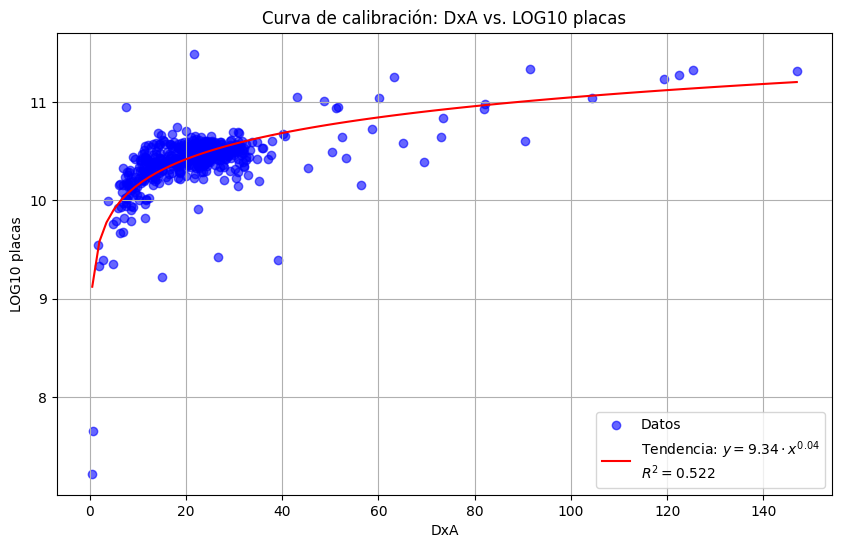

In [30]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# Definir la función potencial: y = a * x^b
def potencial(x, a, b):
    return a * np.power(x, b)

# Paso 1: Visualización de la relación con un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['DxA'], df['LOG10 placas'], color='blue', alpha=0.6, label='Datos')
plt.title('Curva de calibración: DxA vs. LOG10 placas')
plt.xlabel('DxA')
plt.ylabel('LOG10 placas')
plt.grid(True)

# Paso 2: Ajuste de la curva potencial
popt, pcov = curve_fit(potencial, df['DxA'], df['LOG10 placas'])
a, b = popt

# Calcular los valores de y ajustados para obtener el R²
y_ajustada = potencial(df['DxA'], *popt)
ss_res = np.sum((df['LOG10 placas'] - y_ajustada) ** 2)
ss_tot = np.sum((df['LOG10 placas'] - np.mean(df['LOG10 placas'])) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Generar la línea de tendencia usando el modelo ajustado
DxA_range = np.linspace(min(df['DxA']), max(df['DxA']), 100)
trend_line = potencial(DxA_range, a, b)
plt.plot(DxA_range, trend_line, color='red', label=f'Tendencia: $y = {a:.2f} \cdot x^{{{b:.2f}}}$\n$R^2 = {r_squared:.3f}$')

# Mostrar la leyenda con la ecuación y el R²
plt.legend()

# Mostrar gráfico
plt.show()


Conclusión Final

El análisis comparativo entre las metodologías de estimación de UFC/ml mediante absorbancia y recuento en placa revela diferencias significativas entre ambas. Tras una revisión detallada de las distribuciones de ambas variables, así como la aplicación de pruebas estadísticas inferenciales y descriptivas, se concluye lo siguiente:

Diferencias en distribución: Las pruebas de normalidad (Shapiro-Wilk) indicaron que ninguna de las dos variables ('UFC/ml (Abs)' y 'UFC/ml (Placas)') sigue una distribución normal, lo cual respalda el uso de pruebas no paramétricas para el análisis.

Comparación de variabilidad: La prueba de Levene mostró diferencias significativas en la homogeneidad de varianzas entre ambas metodologías. Esto sugiere que la dispersión en las estimaciones de UFC/ml varía dependiendo del método empleado, lo que podría reflejar diferencias en precisión entre absorbancia y recuento en placa.

La prueba de Wilcoxon reveló una diferencia significativa entre ambas metodologías, lo que sugiere que la estimación de UFC/ml mediante absorbancia no es equivalente a la obtenida mediante recuento en placa. Esta discrepancia indica una falta de alineación entre los dos métodos, lo que plantea la necesidad de ajustar o reconsiderar el uso de absorbancia como un método de cuantificación confiable para este tipo de muestras.

Correlación y ajuste de calibración: Aunque se observó una correlación moderada, el ajuste no lineal obtenido para la curva de calibración no muestra un R² lo suficientemente alto como para garantizar que el método de absorbancia proporcione una estimación precisa y consistente de la concentración real de UFC/ml. Esto sugiere que, en análisis futuros, se podría considerar tomar los datos de otra forma o ajustar la curva de calibración para lograr una mejor alineación y precisión en los datos.

Este análisis respalda la hipótesis de que la metodología de absorbancia, tal como está diseñada actualmente, podría no ser completamente adecuada para estimar las UFC/ml de forma precisa y confiable en comparación con el método de recuento en placa. Si bien la absorbancia puede servir como una aproximación, se sugiere realizar ajustes adicionales en su calibración o explorar métodos alternativos para asegurar la precisión en la estimación.

En conjunto, los resultados proporcionan una base para revisar los métodos de estimación en el laboratorio y mejorarlos, lo que contribuiría a garantizar la calidad y la exactitud en el monitoreo de las muestras.






